# Homework 3

For this homework, you will be working extensively in tensorflow. It is suggested that you spin up a Google Cloud VM with a GPU attached. Remember, instructions for doing so are found in Homework 0.

### Part 1: Homework 2, but on tensorflow
### Part 2: DNN on MNIST and CIFAR10
### Part 3: VGG on MNIST and CIFAR10
### (Optional) Part 4, getting state of the art (#SOTA)


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1
You don't have to repeat everything in homework 2, but rather pick one set of two features that worked well for you last homework, and implement logistic regression using tensorflow without using keras (you will practice using keras in parts 2 and 3). In other words, using tensorflow operations, please create a scalar-value loss function and let tensorflow create the training operation for logistic regression, which automatically computes the gradients and updates the weight parameters. Note that the logistic loss is a special case of the softmax cross entropy loss that you've seen when classifying MNIST.

## Acquire data

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
from sklearn.model_selection import train_test_split

number_a = 0 # TODO choose your digit
number_b = 7 # TODO choose your digit

digit_a_indexes = np.where(digits.target==number_a) 
digit_b_indexes = np.where(digits.target==number_b)
targets = np.concatenate((digits.target[digit_a_indexes], digits.target[digit_b_indexes]))
images = np.concatenate((digits.images[digit_a_indexes], digits.images[digit_b_indexes]))
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.1, random_state=42)

In [4]:
def compute_features(vector):
    image = vector.reshape(8, 8) # get back original image shape
    def compute_feature_a(image):
        '''compute_feature_a will compute intensity'''
        intensity = np.mean(image)
        return intensity

    
    def compute_feature_b(image):
        '''compute_feature_b will compute symmetry'''
        ax1=image[4,:]
        ax2=image[:,4]
        cor=np.correlate(ax1,ax2)/1000

        return cor
    
    return compute_feature_a(image), compute_feature_b(image)

(0.024, 1.2)

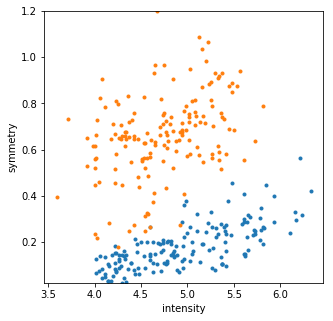

In [5]:
X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_test = np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

X_features_a = X_features[np.where(y_train==number_a)]
X_features_b = X_features[np.where(y_train==number_b)]

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('intensity')
plt.ylabel('symmetry')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max()) 

## Logistic regression

In [13]:
import tensorflow as tf
epoches = 10000
display_step = 1
y_train[y_train == number_a] = 0
y_train[y_train == number_b] = 1
y_test[y_test == number_a] = 0
y_test[y_test == number_b] = 1

In [17]:
x = tf.placeholder(tf.float32, [None, 2]) 
y = tf.placeholder(tf.float32, [None, 1]) 

W = tf.Variable(tf.random.normal(shape = [2, 1]))
b = tf.Variable(tf.random.normal([1, 1]))

In [18]:
L = tf.nn.sigmoid_cross_entropy_with_logits(logits = tf.matmul(x, W) + b, labels = y)
loss = tf.reduce_mean(L)

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(loss)

In [16]:
config = tf.ConfigProto(device_count={'GPU': 0})
sess = tf.InteractiveSession(config=config)
sess.run(tf.global_variables_initializer())
for epoch in range(epoches):
    _, c, w1, bias = sess.run([optimizer, loss, W, b], feed_dict={x: X_features,
                                                  y: y_train.reshape((len(y_train),1))})

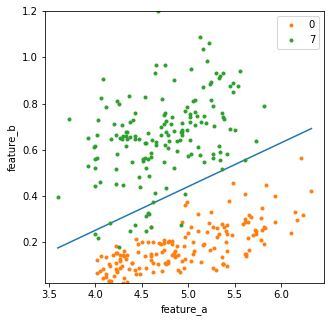

In [15]:
line_x = np.linspace(X_features[:, 0].min(), X_features[:, 0].max())
line_y =  -(w1[0] / W1[1]) * line_x - bias[0]/w1[1]
plt.figure(figsize=(5,5))
plt.plot(line_x, line_y)
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.',label=number_a)
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.',label=number_b)
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max()) 
plt.legend()
plt.show()

# Part 2:  DNN on MNIST and CIFAR10

In our lab, you guys saw how to work with the MNIST dataset to perform image classification. We can attempt the MNIST classification problem with just fully connected layers. This means we will be optimizing for non-banded matrices (no convolutions).

1. Calcualte the number of weight parameters you are optimizing for 1, 2 and 3 differen fully connected layers (the total size of each layer is up to you).
2. What is the max layer depth you can go before training loss does not converge? You can usually tell that something is not converging by examining the training loss vs. iteration curve.
3. How does the number of parameters relate to the training loss and validation/test loss? Try to get a few data points to speak to this question.
3. Keeping the maximum number of parameters possible while still maintaining convergence (i.e., a good training and validation/test loss), what happens when you swap the activation function to `tanh` instead of `relu`? How about `sigmoid`?
4. After exploring the above, train a DNN model with the combination of hyperparameters that you believe will work best on MNIST.
5. Using the same architecture, try training a DNN model on more difficult dataset such as Fashion MNIST or CIFAR10/100. Example download instructions are shown in the next problem.

### Must haves
1. Make a curve of the final validation/test loss of your DNN after the loss plateaus as a function of the number of weight parameters used (final loss versus # parameters used). Note that you might see something like the curve below for a low number of parameters, but as the number of parameters increases, it will not look like this plot. 
2. On the same figure, make the same curve as above, but use different activation functions in your architecture.
3. Plot a point corresponding to your crafted DNN archiecture for question 4.
4. Repeat 1-3 for CIFAR10

The curves when reasonable # params are used look like the below
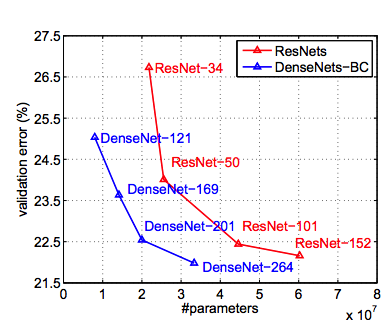

Training data shape (60000, 28, 28, 1)


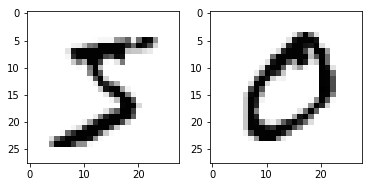

In [3]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets

(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)


print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.Greys);
ax2.imshow(X_train[1].reshape(28, 28), cmap=plt.cm.Greys);

In [361]:
nbr_params1 = list()
val_loss1 = list()

In [3]:
nbr_params2 = list()
val_loss2 = list()

In [83]:
nbr_params3 = list()
val_loss3 = list()

# MNIST

In [124]:
# sequential
model = tf.keras.Sequential([])
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
for i in range(3):
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# model.summary()
model.count_params()

96137

In [115]:
model.compile(optimizer=tf.train.AdamOptimizer(0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))
hist = model.fit(X_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[early_stop, tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.8794 - acc: 0.7745 - val_loss: 0.4600 - val_acc: 0.8870
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.4016 - acc: 0.8947 - val_loss: 0.3454 - val_acc: 0.9054
Epoch 3/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.3243 - acc: 0.9103 - val_loss: 0.2993 - val_acc: 0.9118
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2842 - acc: 0.9199 - val_loss: 0.2712 - val_acc: 0.9210
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2656 - acc: 0.9245 - val_loss: 0.2626 - val_acc: 0.9245


In [117]:
hist.history['val_loss']

[0.4599924124240875,
 0.34539978332519533,
 0.2992695023059845,
 0.2711848631858826,
 0.2625513475894928]

### relu

In [401]:
nbr_params1.append(model.count_params()/100000)
val_loss1.append(hist.history['val_loss'][-1])

nbr_params1 ,val_loss1

([0.9971, 1.3001, 1.6031, 1.9061, 2.2091, 2.5121, 2.8151],
 [0.36152626404040494,
  0.13827041283100844,
  0.12549678385145963,
  0.11492508218828588,
  0.11518647431991995,
  0.14771360893696547,
  0.16202537179887294])

Text(0, 0.5, 'validation loss')

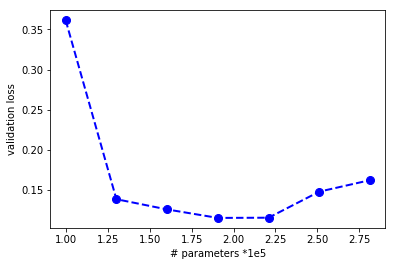

In [402]:
plt.plot(nbr_params1,val_loss1,color='blue',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')

### tanh

In [61]:
nbr_params2.append(model.count_params()/100000)
val_loss2.append(hist.history['val_loss'][-1])

nbr_params2 ,val_loss2

([0.0796, 0.3976, 0.7951, 1.5901, 2.7961, 6.0121, 7.2181],
 [0.5690830006599427,
  0.32177255511283875,
  0.29553668751716616,
  0.23753673026561736,
  0.1876893175601959,
  0.23319726613461972,
  0.2572031683444977])

Text(0, 0.5, 'validation loss')

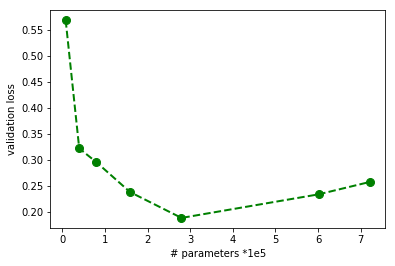

In [129]:
plt.plot(nbr_params2,val_loss2,color='green',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')

### sigmoid

In [112]:
nbr_params3.append(model.count_params()/100000)
val_loss3.append(hist.history['val_loss'][-1])

nbr_params3 ,val_loss3

([0.3976, 0.7951, 0.8961, 0.9971, 1.0981],
 [0.29234143877029417,
  0.23496687906980515,
  0.22296253595352172,
  0.2375563503742218,
  0.27982041239738464])

Text(0, 0.5, 'validation loss')

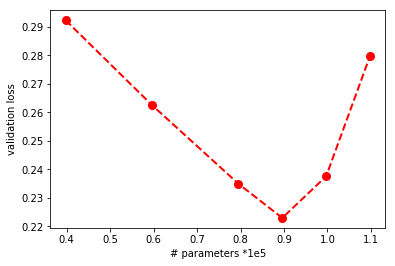

In [128]:
plt.plot(nbr_params3,val_loss3,color='red',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')

### show in one plot

In [31]:
nbr_params1 = [0.9971, 1.3001, 1.6031, 1.9061, 2.2091, 2.5121, 2.8151]
val_loss1 = [0.36152626404040494,
  0.13827041283100844,
  0.12549678385145963,
  0.11492508218828588,
  0.11518647431991995,
  0.14771360893696547,
  0.16202537179887294]

nbr_params2 = [0.0796, 0.3976, 0.7951, 1.5901, 2.7961, 6.0121, 7.2181]
val_loss2 = [0.5690830006599427,
  0.32177255511283875,
  0.29553668751716616,
  0.23753673026561736,
  0.1876893175601959,
  0.23319726613461972,
  0.2572031683444977]

nbr_params3 = [0.3976, 0.59635, 0.7951, 0.8961, 0.9971, 1.0981]
val_loss3 = [0.29234143877029417,
  0.2625513475894928,
  0.23496687906980515,
  0.22296253595352172,
  0.2375563503742218,
  0.27982041239738464]

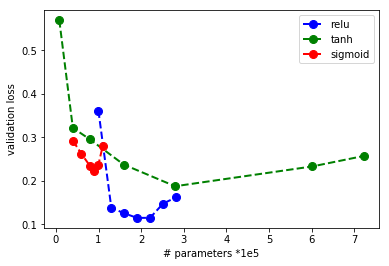

In [133]:
plt.plot(nbr_params1,val_loss1,color='blue',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot(nbr_params2,val_loss2,color='green',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot(nbr_params3,val_loss3,color='red',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')
plt.legend(['relu','tanh','sigmoid'])

### ReLU function seems works best, because it had the lowest validation loss.

# CIFAR 10

Training data shape (50000, 32, 32, 3)


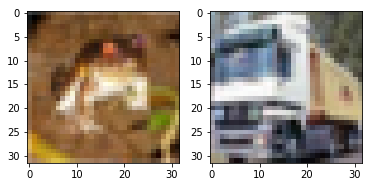

In [2]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets

(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)


print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32,32,3));
ax2.imshow(X_train[1].reshape(32,32,3));

In [5]:
nbr_params4 = list()
val_loss4 = list()

In [6]:
nbr_params5 = list()
val_loss5 = list()

In [7]:
nbr_params6 = list()
val_loss6 = list()

In [162]:
# sequential
model = tf.keras.Sequential([])
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
for i in range(22):
    model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# model.summary()
model.count_params()

382730

In [163]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [165]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))
hist = model.fit(X_train, y_train,
          batch_size=64,
          epochs=5,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[early_stop, tensorboard])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 12s 249us/step - loss: 2.0149 - acc: 0.2228 - val_loss: 1.9927 - val_acc: 0.2321
Epoch 2/5
50000/50000 [==============================] - 12s 241us/step - loss: 1.9837 - acc: 0.2347 - val_loss: 1.9525 - val_acc: 0.2445
Epoch 3/5
50000/50000 [==============================] - 13s 251us/step - loss: 1.9425 - acc: 0.2570 - val_loss: 1.9624 - val_acc: 0.2560
Epoch 4/5
50000/50000 [==============================] - 13s 252us/step - loss: 1.9347 - acc: 0.2620 - val_loss: 1.9317 - val_acc: 0.2612
Epoch 5/5
50000/50000 [==============================] - 12s 249us/step - loss: 1.9099 - acc: 0.2712 - val_loss: 1.8767 - val_acc: 0.2915


In [166]:
hist.history['val_loss']

[1.9926611227035522,
 1.952451404571533,
 1.9624285099029541,
 1.9316772005081178,
 1.8766875743865967]

### relu

In [167]:
nbr_params4.append(model.count_params()/100000)
val_loss4.append(hist.history['val_loss'][-1])

nbr_params4 ,val_loss4 

([2.9849, 3.1793, 3.3737, 3.5681, 3.8273],
 [1.8114259412765503,
  1.773914409637451,
  1.7683533994674683,
  1.7068933708190919,
  1.8766875743865967])

Text(0, 0.5, 'validation loss')

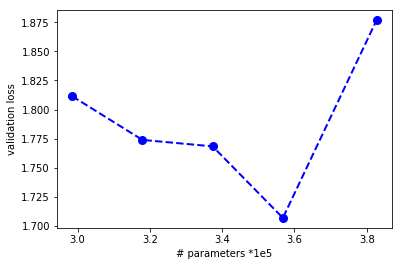

In [168]:
plt.plot(nbr_params4,val_loss4,color='blue',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')

### tanh

In [19]:
hist.history['val_loss']

[2.381060456085205, 2.381689568710327, 2.4088318866729734, 2.4117466915130614]

In [20]:
nbr_params5.append(model.count_params()/100000)
val_loss5.append(hist.history['val_loss'][-1])

nbr_params5 ,val_loss5 

([3.9921, 4.2951, 4.6991, 5.0021, 5.5071],
 [2.4322468070983887,
  2.3729797412872315,
  2.3800171646118162,
  2.378957905578613,
  2.4117466915130614])

Text(0, 0.5, 'validation loss')

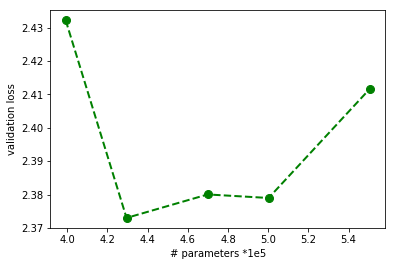

In [21]:
plt.plot(nbr_params5,val_loss5,color='green',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')

### sigmoid

In [77]:
hist.history['val_loss']

[2.311996503448486,
 2.3095619773864744,
 2.307213554763794,
 2.308537901306152,
 2.30630047454834]

In [78]:
nbr_params6.append(model.count_params()/100000)
val_loss6.append(hist.history['val_loss'][-1])

nbr_params6 ,val_loss6 

([3.7901, 3.9921, 4.2951, 4.8001, 5.5071],
 [2.3109318279266358,
  2.305186068725586,
  2.3051535568237305,
  2.3046873458862303,
  2.30630047454834])

Text(0, 0.5, 'validation loss')

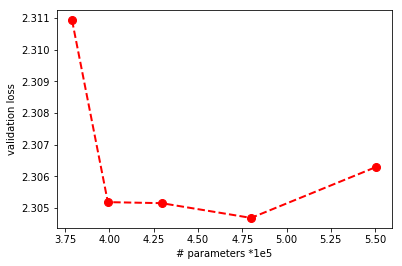

In [79]:
plt.plot(nbr_params6,val_loss6,color='red',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')

### show in one plot

In [83]:
nbr_params4 = [2.9849, 3.1793, 3.3737, 3.5681, 3.8273]
val_loss4 = [1.8114259412765503,
  1.773914409637451,
  1.7683533994674683,
  1.7068933708190919,
  1.8766875743865967]

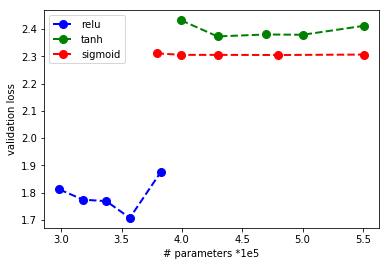

In [84]:
plt.plot(nbr_params4,val_loss4,color='blue',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot(nbr_params5,val_loss5,color='green',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot(nbr_params6,val_loss6,color='red',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')
plt.legend(['relu','tanh','sigmoid'])

### ReLU works best with lowest validation loss

# Part 3. VGG on CIFAR100 and CIFAR10

VGG is a simple, but powerful CNN created in 2015. Read the VGG paper here: https://arxiv.org/pdf/1409.1556.pdf

Here, we're going to try to reproduce the model's findings on the cifar10 and cifar100 dataset. Note that the paper takes 224 x 224 images, but cifar10 and 100 are only 32 x 32 images.

1. Implement all of the layers for the VGG ConvNet Configuration A. Please use the shell code below as guide. Then, train this network on the Cifar10 and Cifar100 datasets.
2. For Cifar10 and 100, VGG is probably overkill. Try changing the number of layers and number of filters without sacrificing too much performance accuracy. How many filters can you get rid of before you see the accuracy drop by more than 2%? Where in the architecture is it better to remove filters - towards the input layers, or more towards the output layers?
3. For what you experiment with--report the parameter, validation loss curves for changing the number of i) layers, ii) filter size, iii) both.

# cifar10

Training data shape (50000, 32, 32, 3)


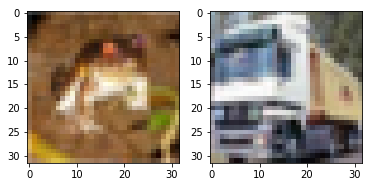

In [3]:
# This is the same model in the other notebook, looks very simplified.
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));

### cifar10 filter_size

In [9]:
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()
model.count_params()

430102

In [31]:
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()
model.count_params()


464406

In [32]:
hist = model.fit(X_train, y_train,
          batch_size=256,
          epochs=5,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 107s 2ms/step - loss: 2.9735 - acc: 0.2990 - val_loss: 1.6606 - val_acc: 0.3985
Epoch 2/5
50000/50000 [==============================] - 106s 2ms/step - loss: 1.5073 - acc: 0.4570 - val_loss: 1.4109 - val_acc: 0.4922
Epoch 3/5
50000/50000 [==============================] - 104s 2ms/step - loss: 1.2971 - acc: 0.5366 - val_loss: 1.3206 - val_acc: 0.5334
Epoch 4/5
50000/50000 [==============================] - 104s 2ms/step - loss: 1.1479 - acc: 0.5920 - val_loss: 1.2002 - val_acc: 0.5744
Epoch 5/5
50000/50000 [==============================] - 104s 2ms/step - loss: 1.0322 - acc: 0.6359 - val_loss: 1.1845 - val_acc: 0.5940


In [13]:
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (7,7), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(64, (7,7), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()
model.count_params()


515862

In [14]:
hist = model.fit(X_train, y_train,
          batch_size=256,
          epochs=5,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 169s 3ms/step - loss: 3.5231 - acc: 0.3215 - val_loss: 1.5802 - val_acc: 0.4351
Epoch 2/5
50000/50000 [==============================] - 170s 3ms/step - loss: 1.4440 - acc: 0.4844 - val_loss: 1.4358 - val_acc: 0.4887
Epoch 3/5
50000/50000 [==============================] - 169s 3ms/step - loss: 1.2338 - acc: 0.5626 - val_loss: 1.2622 - val_acc: 0.5564
Epoch 4/5
50000/50000 [==============================] - 169s 3ms/step - loss: 1.0791 - acc: 0.6193 - val_loss: 1.1854 - val_acc: 0.5873
Epoch 5/5
50000/50000 [==============================] - 167s 3ms/step - loss: 0.9503 - acc: 0.6653 - val_loss: 1.1890 - val_acc: 0.5873


In [17]:
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (9,9), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(64, (9,9), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()
model.count_params()


584470

In [20]:
nbr_params7 = ([4.30102,4.64406,5.15862,5.84470])
val_loss7 = ([1.6041,1.1845,1.1890,1.1052])

Text(0, 0.5, 'validation loss')

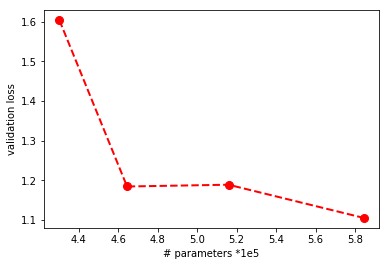

In [21]:
plt.plot(nbr_params7,val_loss7,color='red',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')

### cifar10 adding layers

In [43]:
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()
model.count_params()

491926

In [44]:
hist = model.fit(X_train, y_train,
          batch_size=256,
          epochs=5,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 121s 2ms/step - loss: 2.7367 - acc: 0.3828 - val_loss: 1.4247 - val_acc: 0.4954
Epoch 2/5
50000/50000 [==============================] - 119s 2ms/step - loss: 1.2936 - acc: 0.5456 - val_loss: 1.2217 - val_acc: 0.5716
Epoch 3/5
50000/50000 [==============================] - 120s 2ms/step - loss: 1.1244 - acc: 0.6068 - val_loss: 1.1360 - val_acc: 0.6026
Epoch 4/5
50000/50000 [==============================] - 119s 2ms/step - loss: 0.9929 - acc: 0.6583 - val_loss: 1.0780 - val_acc: 0.6249
Epoch 5/5
50000/50000 [==============================] - 119s 2ms/step - loss: 0.8858 - acc: 0.6914 - val_loss: 0.9875 - val_acc: 0.6567


In [45]:
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()
model.count_params()

1620886

In [46]:
hist = model.fit(X_train, y_train,
          batch_size=64,
          epochs=5,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 207s 4ms/step - loss: 1.9182 - acc: 0.4219 - val_loss: 1.3820 - val_acc: 0.5004
Epoch 2/5
50000/50000 [==============================] - 205s 4ms/step - loss: 1.2331 - acc: 0.5607 - val_loss: 1.1984 - val_acc: 0.5735
Epoch 3/5
50000/50000 [==============================] - 204s 4ms/step - loss: 1.0466 - acc: 0.6330 - val_loss: 1.1248 - val_acc: 0.6100
Epoch 4/5
50000/50000 [==============================] - 203s 4ms/step - loss: 0.9188 - acc: 0.6785 - val_loss: 1.0427 - val_acc: 0.6364
Epoch 5/5
50000/50000 [==============================] - 207s 4ms/step - loss: 0.7932 - acc: 0.7242 - val_loss: 0.9660 - val_acc: 0.6673


In [63]:
nbr_params8 = ([4.30102,2.99158,4.91926,16.20886])
val_loss8 = ([1.2371,1.1522,0.9875,0.9660])

Text(0, 0.5, 'validation loss')

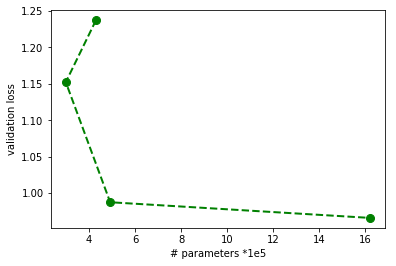

In [64]:
plt.plot(nbr_params8,val_loss8,color='green',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')

## cifar100

In [11]:
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar100.load_data()

In [ ]:
nbr_params9 = ([])
val_loss9 = ([])

In [ ]:
nbr_params10 = ([])
val_loss10 = ([])

In [ ]:
plt.plot(nbr_params9,val_loss9,color='blue',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')

In [ ]:
plt.plot(nbr_params10,val_loss10,color='blue',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('# parameters *1e5')
plt.ylabel('validation loss')

# (Optional) Part 4, state of the art

Currently, state of the art implementations in the image classification problem are DenseNet: (https://arxiv.org/abs/1608.06993), ResNet (https://arxiv.org/abs/1512.03385), and ResNext (https://arxiv.org/pdf/1611.05431.pdf). Try implementing and training one of these on the cifar10 and cifar100 dataset. Feel free to experiment.

Jargon to learn about
1. What is "residual learning"?
2. What is a "bottleneck layer"?
3. What is a "dense block"?